# Statistics


In [1]:
using Distributions
using StatsBase

In [2]:
using Random
using Statistics

In [3]:
using CairoMakie

Before making any inferences from a dataset, it is crucial that we understand the features of datasets by 'describing' them. We can either describe them by graphing or calculating numerical summarisations.

We will refresh most common descriptive statistics in this chapter, if you are working with data on a daily basis, no concepts here should sound strange to you.

Furthermore, we will not engage in complex programming techniques, such as OOP and sophisticated data structures. All the programmes should be self-explanatory to most of audiences.


# Histogram


Strictly speaking, frequency distribution and histogram are different descriptive tools, though they are delivering the largely identical information. Frequency distribution are usually presented in a table, for instance, rolling a dice $1000$ times might give a us frequency distribution table as following:

<table style="text-align:center; width:30%; text-align:center;font-size: 150% ">
  <caption style = "font-size: 110%">Rolling A Dice 1000 Times</caption>
  <tr>
    <th>Sides</th>
    <th>Frequency</th>
  </tr>
  <tr>
    <td>1</td>
    <td>172</td>
  </tr>
  <tr>
    <td>2</td>
    <td>158</td>
  </tr>
  <tr>
    <td>3</td>
    <td>170</td>
  </tr>
  <tr>
    <td>4</td>
    <td>158</td>
  </tr>
  <tr>
    <td>5</td>
    <td>187</td>
  </tr>
  <tr>
    <td>6</td>
    <td>155</td>
  </tr>
</table>


Or we can draw a frequency histogram, which simply converts the information of table into a graph.


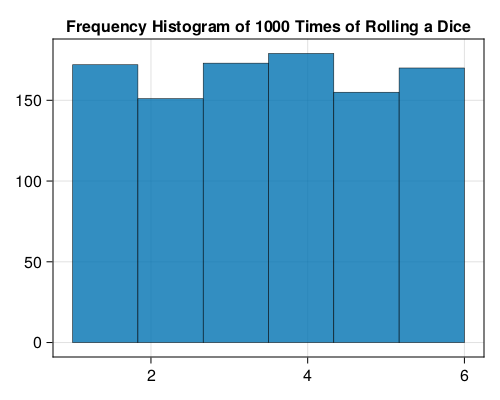

In [4]:
Random.seed!(42);
rollings = rand(1:6, 1000);

fig = Figure(resolution = (500, 400));
ax = Axis(fig[1, 1], title = "Frequency Histogram of 1000 Times of Rolling a Dice");

hist!(ax, rollings; bins = 6, strokewidth = 0.5, strokecolor = :black);
fig

Next we try generating an array from a standard normal distribution $x∼ N(0, 1)$, then plot the histogram.


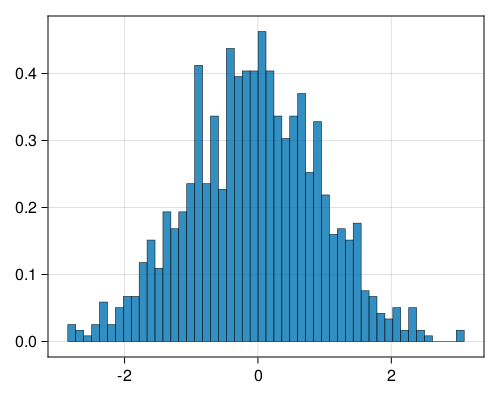

In [5]:
Random.seed!(42);
x = randn(1000);

fig = Figure(resolution = (500, 400));
ax = Axis(fig[1, 1]);

hist =
    hist!(ax, x; bins = 50, normalization = :pdf, strokewidth = 0.5, strokecolor = :black);
fig


In [6]:
function h_counts(pic)
    vals = pic.plots[1][1] |> to_value
    m = hcat(vals...) |> transpose
    return m[:, 2]
end


h_counts (generic function with 1 method)

The first charts below shows the same information as histogram, but with line plots rather than bars. But the second one is called \*Empirical cumulative distribution**, it is empirical because it is not theoretically plotted, i.e. using a **cumulative distribution function (CDF)\*\*.


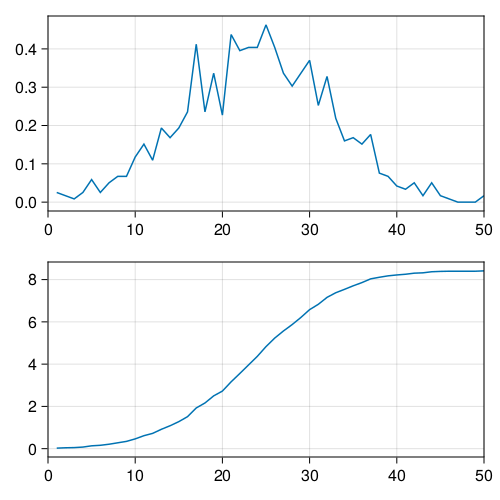

In [7]:
hst_counts = h_counts(hist);

fig = Figure(resolution = (500, 500));
ax = Axis(fig[1, 1]);
lines!(ax, 1:50, hst_counts);
xlims!(ax, (0, 50));

ax2 = Axis(fig[2, 1]);
lines!(ax2, 1:50, cumsum(hst_counts));
xlims!(ax2, (0, 50));
fig

# Measures of Location


The most important **mean** we need is **arithmetic mean**, which is prevalent in all kinds of statistical techniques.

$$
μ = \frac{1}{N}∑_{i=1}^Nx_i\\
\bar{x} = \frac{1}{n}∑_{i=1}^nx_i
$$

The former one is _population mean_, the latter is _sample mean_. The formulae appear the same, but with different indication. $N$ is the population size, imagine the number of all human beings on earth, on the other hand, $n$ is sample size, for instance a sample of $1000$ persons from UK.

And one tricky mean commonly used in finance is **geometric mean**, not so intuitive at first sight.

$$
g = \bigg(∏_{i=1}^nx_i\bigg)^{1/n}
$$

If you can't make sense out of it, accept a fact that geometric mean is commonly used when calculating _compound growth rates_, such as portfolio return. For instance, a portfolio manager has annual return recorded as below


<table style="text-align:center; width:40%; text-align:center;font-size: 150% ">
  <caption style = "font-size: 110%">Portfolio Return</caption>
  <tr>
    <th>Year</th>
    <th>Return</th>
  </tr>
  <tr>
    <td>2015</td>
    <td>36%</td>
  </tr>
  <tr>
    <td>2016</td>
    <td>23%</td>
  </tr>
  <tr>
    <td>2017</td>
    <td>-48%</td>
  </tr>
  <tr>
    <td>2018</td>
    <td>-30%</td>
  </tr>
  <tr>
    <td>2019</td>
    <td>15%</td>
  </tr>
  <tr>
    <td>2020</td>
    <td>31%</td>
  </tr>
  <tr>
    <td>Arithmetic Mean</td>
    <td>4.5%</td>
  </tr>
  <tr>
    <td>Geometric Mean</td>
    <td>-1.4%</td>
  </tr>
</table>


In [8]:
percent(x::Float64; d::Int64 = 2) = round(100x; digits = d);


The arithmetic mean of return is $4.45\%$.


In [9]:
portfolio_return = [0.36, 0.23, -0.48, -0.3, 0.15, 0.31]
portfolio_return |> mean |> x -> percent(x; d = 3)


4.5

However the geometric mean of return is $-1.42\%$. Geometric mean is more accurate measurement when considering the compound effect, i.e. the data are related to each other by a growth rate.


In [10]:
(((portfolio_return .+ 1) |> geomean) - 1) |> x -> percent(x; d = 3)


-1.428

# Measures of Variability


The first measurement of variability is the **range** measuring distance from lowest to highest. We'll generate an array of standard normal distribution for demonstration.


In [11]:
Random.seed!(42);
x = randn(50);
rangeLS = max(x...) - min(x...);
rangeLS

5.729430988393148

**Percentile** is also a common statistic concept, which could be best explained by an example. For instance, the GRE test result shows percentile besides your absolute score, say you have a percentile of $96\%$, it means your score is higher than $96\%$ of candidates. The special percentile of $75\%$ and $25\%$ are sometimes called the _third quartile_ and _first quartile_.


In [12]:
q75, q25 = quantile(x, [0.75, 0.25]);
q75 - q25

1.1594399713200514

Before moving any further, we must clarify two statistical concepts: **population** and **sample**. For example, we want to know the variance of all human adults height, therefore we ought to measure all adults (population) on earth in order to calculate the variance, however the mission is impossible, instead we measure a smaller group of adults (sample) to make inferential statements about population.

Population and sample variance differ in degree of freedom, where $N$ is the population size, whereas $n$ is the sample size, $μ$ is the population mean and $\bar{x}$ is the sample mean. The formulae of variances are

$$
σ^2 = \frac{∑(x_i - μ)^2}{N}\\
s^2 = \frac{∑(x_i - \bar{x})^2}{n-1}
$$

The latter is an unbiased estimator of population variance, which is also the _sample variance_.

To illustrate the idea, let's pretend there are only $N = 1000$ people on earth, we can generate an array to represent the population height, only for demonstrative purpose. We generate a population by $X∼ N(170, 10)$, then calculate the population variance.


In [13]:
Random.seed!(42);
d_normal = Normal(170, 10);

population_height = rand(d_normal, 1000);
population_height |> mean |> println
population_height |> var |> println

170.63417586073794
94.3196994455534


Now suppose we know nothing about the population, but we can get a sample of 100 persons.


In [14]:
Random.seed!(42);
sample_height = rand(population_height, 100);

sample_height |> mean |> println
sample_height |> var |> println
sample_height |> x -> varm(x, mean(sample_height)) |> println

169.76337820069224
79.83496754314946
79.83496754314946


Theoretically, we can have tremendous amount of samples, say $10000$ samples. Yes, I mean $10000$ samples, not the sample size, but this is just a thought experiment, will never be achieved in real world. Again, pure demonstrative purpose.

What we are doing next: generate $10000$ samples, calculate the sample variances, plot histogram. The vertical line is the mean of sampling distribution of variance estimates. We set standard deviation of $σ = 10$, the theoretical variance $σ^2=100$, therefore we see the point estimator is doing a fair well job.


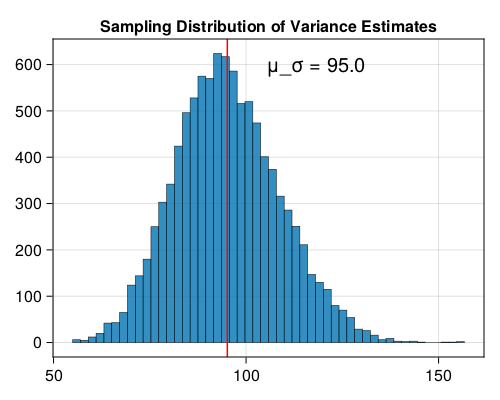

In [15]:
sample_height_array = Array{Float64}(undef, 10000)
population_height_mean = mean(population_height);

for i ∈ 1:10000
    sample_height = rand(population_height, 100)
    sample_height_array[i] = varm(sample_height, population_height_mean)
end

fig = Figure(resolution = (500, 400));
ax = Axis(fig[1, 1], title = "Sampling Distribution of Variance Estimates")

hist2 = hist!(ax, sample_height_array, bins = 50, strokewidth = 0.5, strokecolor = :black)
vlines!(ax, mean(sample_height_array), color = :red)
text!(
    ax,
    "μ_σ = $(mean(sample_height_array) |> round)",
    position = (mean(sample_height_array) + 10, maximum(h_counts(hist2)) - 50),
)
fig

I guess you have noticed the power of estimators now, if you have many samples, by using an unbiased sample estimator, you will get an accurate estimate of population parameters. Even if you have only one sample, you can still can estimate how possible you would be correct based on sampling distribution.


But we shall keep in mind that **standard deviation** is the most popular measurement of variability. The population/sample standard deviation is simply the square root of variances respectively.


$$
σ = \sqrt{σ^2}\\
s = \sqrt{s^2}
$$


Similar to variance function in NumPy.


In [16]:
stdm(sample_height_array, population_height_mean)

76.71374145156965

# Measures of Distribution Shape


**z-score** is defined as below, used for measuring how many standard deviations away from the mean.

$$
\begin{equation}
z_i = \frac{x_i-\bar{x}}{s}
\end{equation}
$$

Note that $z$ has subscript notation $i$ which means each observation has its own $z$-score.

<blockquote>Actually，measuring how many standard deviations away from the mean (or hypothesis) is the fundamental philosophy of frequentist statistics, it asks one important question: <i>how far away from the mean is far-away?</i> If it is far enough, very likely the <i>mean</i> we are looking at right now is not the 'real' mean of the random mechanism that generates the observation.</blockquote>

Here is the example of calculating $z$-score for an randomly generated array. So you can see for a standard normal distribution, it would be fairly hard to stray $2$ standard deviations away.


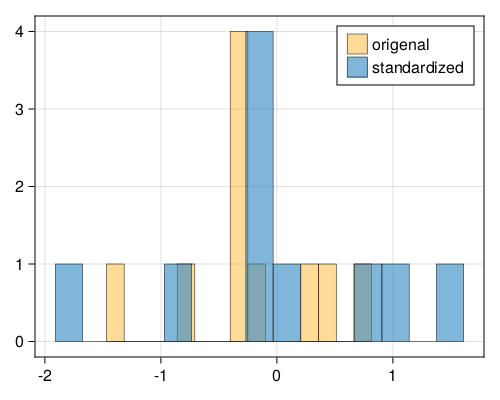

In [17]:
Random.seed!(42);
x = randn(10);
z = (x .- mean(x)) ./ std(x);

fig = Figure(resolution = (500, 400));
ax = Axis(fig[1, 1])
hist!(
    ax,
    x,
    strokewidth = 0.5,
    color = (:orange, 0.4),
    strokecolor = :black,
    label = "origenal",
);
hist!(
    ax,
    z,
    strokewidth = 0.5,
    color = ("#2E86C3", 0.6),
    strokecolor = :black,
    label = "standardized",
);
axislegend(ax, position = :rt);
fig

## Chebyshev's Theorem


**Chebyshev's Theorem** is used as the last resort of deduction when we have absolute _no knowledge_ of a sample and its distribution. It guarantees minimum proportion of data that must be within $z$ standard deviation from the mean, where the $z$ is $z$-score. But the downside of the theorem is that it only addresses the symmetric distribution.

\begin{equation}
p ≥ 1-\frac{1}{z^2}
\end{equation}

For instance, the average height of people in Helsinki is $174cm$, with a standard deviation of of $4cm$, so the question is how many people (percentage) are within $166cm$ and $182cm$? Note that this range is symmetrically $2$ standard derivations away from its mean. Thus according to Chebyshev, we know that


In [18]:
zₗ = (166 - 174) / 4 # lower z-score
zᵤ = (182 - 174) / 4 # upper z-score

2.0

Because it is a symmetric range, $z$-score on each sides are equal, we can calculate the probability as below and print the conclusion.


In [19]:
p = 1 - 1 / zₗ^2
print("At least $(100p)% of people are within 168cm and 182cm in Helsinki.")

At least 75.0% of people are within 168cm and 182cm in Helsinki.

If you think of Chebyshev as a function, then the only variable is $z$-score. Now we define a Chebyshev function and plot it against $z$-score.

Because $z$-score means how many standard deviation away from the mean, from the graph we could conclude that no matter what types of distributions we are investigating, it is guaranteed that $± 2.5$ standard deviation range would cover at least $84\%$ of data.


In [20]:
chebyshev(z) = 1 - 1 / z^2;

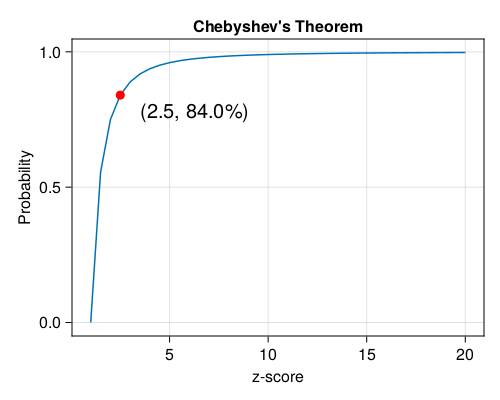

In [21]:
zscores = 1:0.5:20

chebyshev_array = Array{Float64}(undef, length(zscores))

for (ind, z) ∈ enumerate(zscores)
    chebyshev_array[ind] = chebyshev(z)
end

fig = Figure(resolution = (500, 400));
ax = Axis(
    fig[1, 1],
    title = "Chebyshev's Theorem",
    xlabel = "z-score",
    ylabel = "Probability",
)

lines!(ax, zscores, chebyshev_array)
scatter!(ax, [2.5], [chebyshev(2.5)], color = :red)
text!(ax, "(2.5, $(chebyshev(2.5) * 100)%)", position = (3.5, chebyshev(2.5) - 0.1))

fig


However in practice we are more likely to deal with data of (semi)bell-shape distribution, they are regular and easier to make deduction. So **Empirical Rules** apply.

- 68% of data within 1 standard deviation of the mean
- 95% of data within 2 standard deviation of the mean
- 99.7% of data within 3 standard deviation of the mean

These empirical numbers are from normal distribution.


# Measures of Association


With similar notation, the **population** and **sample covariance** is defined as:

$$
σ_{xy} \frac{∑(x_i-μ_x)(y_i-μ_y)}{N}\\
s_{xy} \frac{∑(x_i-\bar{x})(y_i-\bar{y})}{n-1}
$$


Generate two random arrays, then evaluate a covariance matrix. The values on the diagonal presents the variance, the off-diagonal presents the covariance.


In [22]:
Random.seed!(42);
x = randn(300);
y = rand(300);
cov(x, y)

-0.009355463476744815

**Correlation Coefficent** is normalized version of covariance, just like the standard deviation is the normalised variance, some statistics textbook calls it <i>Pearson Product Moment Correlation Coefficient</i>.

$$
ρ = \frac{σ_{xy}}{σ_xσ_y}\\
r_{xy}=\frac{s_{xy}}{s_xs_y}
$$


For the sake of everyone's sanity, not to cluster the lecture notes with repetive codes, some of them were transported in to `plot_material.py` module. Take a look inside if you are curious.

What we did below was basically generating eight linear regression plot $Y = β_1+β_2X+u$ with different parameters. The correlation coefficient $ρ$ is displayed in the graph, therefore you could observe that the correlation coefficients are affected by size of parameters $β_2$ and scale of error term.

The reasons are:

- The more significantly $β_2$ differs from $0$, the more siginificant linear relationship the model has, therefore the relatively larger correlation between $X$ and $Y$.
- If the parameters $β_1$ and $β_2$ kept constant, the larger scale of the error term, the more dispersed the data are, therefore lower correlation as well.


We will dive much deeper into linear regression in our econometrics training sessions.
